In [1]:
import warnings
from deepxde.backend.set_default_backend import set_default_backend

warnings.filterwarnings("ignore")
set_default_backend("tensorflow")

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term
Setting the default backend to "tensorflow". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


### 1. Оптимизация алгоритмов

Одной из ключевых задач в искусственном интеллекте является оптимизация алгоритмов, то есть выбор таких параметров модели, которые минимизируют ошибку прогнозирования. В этом контексте широко используются методы градиентного спуска и его вариации (например, стохастический градиентный спуск, Adam и т. д.), основанные на дифференциальном исчислении. Дифференциальные уравнения позволяют точно описать, как изменяется ошибка с изменением каждого параметра модели, что делает возможным эффективное нахождение минимума функции потерь.

Градиентный спуск - это фундаментальный метод оптимизации, широко применяемый в машинном обучении для минимизации функции потерь. Основная идея состоит в том, чтобы итеративно обновлять параметры модели в направлении, противоположном градиенту функции потерь по этим параметрам. Это похоже на спуск вниз по склону до самой низкой точки.

В представленном коде мы минимизируем квадратичную функцию потерь $(x - 5)^2$, которая имеет минимум при x = 5. Производная этой функции $2 \cdot (x - 5)$ указывает направление наискорейшего увеличения функции. Чтобы найти минимум, мы движемся в противоположном направлении.

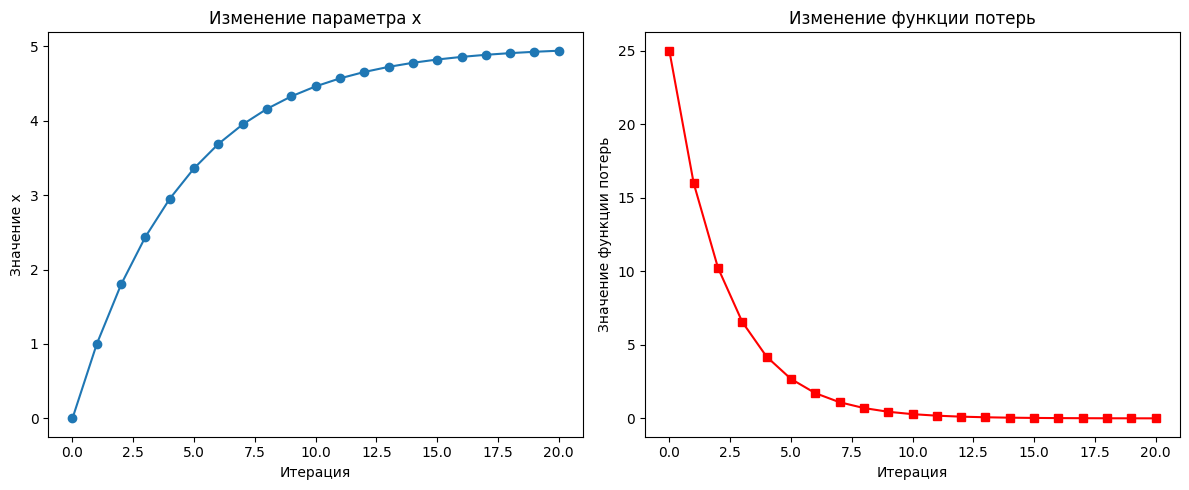

In [2]:
import matplotlib.pyplot as plt


# Функция потерь и ее производная
def loss_function(x):
    return (x - 5) ** 2


def derivative_loss_function(x):
    return 2 * (x - 5)


# Параметры градиентного спуска
learning_rate = 0.1
initial_guess = 0

# Инициализация переменных для хранения истории обновлений
x_updates = [initial_guess]
loss_updates = [loss_function(initial_guess)]

# Цикл градиентного спуска
x = initial_guess
for i in range(20):
    grad = derivative_loss_function(x)
    x = x - learning_rate * grad
    x_updates.append(x)
    loss_updates.append(loss_function(x))

# Визуализация
plt.figure(figsize=(12, 5))

# График изменения параметра x
plt.subplot(1, 2, 1)
plt.plot(x_updates, "o-")
plt.title("Изменение параметра x")
plt.xlabel("Итерация")
plt.ylabel("Значение x")

# График изменения значения функции потерь
plt.subplot(1, 2, 2)
plt.plot(loss_updates, "r-s")
plt.title("Изменение функции потерь")
plt.xlabel("Итерация")
plt.ylabel("Значение функции потерь")

plt.tight_layout()
plt.show()


### 2. Моделирование временных рядов

В задачах прогнозирования временных рядов часто используются рекуррентные нейронные сети (RNN) и их разновидности, такие как LSTM (Long Short-Term Memory) и GRU (Gated Recurrent Unit). Основной идеей этих подходов является моделирование временных зависимостей данных. Дифференциальные уравнения помогают в формализации этих зависимостей, в частности, позволяя описать динамику изменения состояния системы во времени, что является ключевым для прогнозирования будущих значений временных рядов.

LSTM (Long Short-Term Memory) - это особый вид рекуррентных нейронных сетей, который эффективно решает проблемы, связанные с долгосрочными зависимостями в данных. Они широко используются для задач прогнозирования временных рядов благодаря способности запоминать информацию на значительные промежутки времени.

В примере мы создаем модель LSTM для прогнозирования следующего значения в данных временного ряда. Модель состоит из одного слоя LSTM, за которым следует плотный слой, выход которого представляет прогнозируемое значение.

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


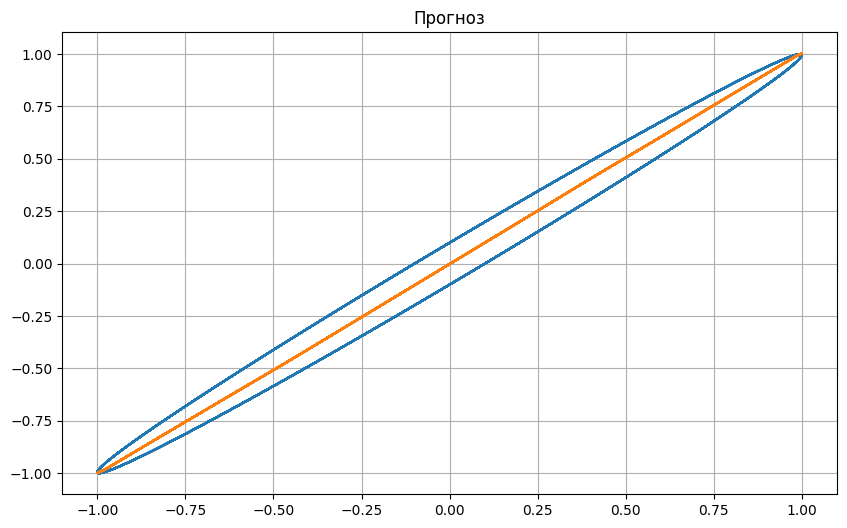

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Пример генерации искусственных данных временных рядов
data = np.sin(np.linspace(0, 100, 1000))
X = np.expand_dims(data[:-1], axis=-1)
Y = data[1:]

# Создание модели LSTM
model = Sequential([LSTM(50, activation="relu", input_shape=(1, 1)), Dense(1)])

model.compile(optimizer="adam", loss="mse")

# Обучение модели
model.fit(X, Y, epochs=200, verbose=0)

# Прогнозирование
predicted = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(X, Y)
plt.plot(X, predicted)
plt.title("Прогноз")
plt.grid(True)
plt.show()


### 3. Интегральные уравнения в обработке изображений и сигналов

В области обработки изображений и сигналов интегральные уравнения применяются для описания различных физических процессов, таких как распространение света, звуковых волн и т. д. Такие модели находят применение в разработке алгоритмов компьютерного зрения и служат основой для создания более эффективных и точных систем ИИ, способных анализировать и интерпретировать визуальную информацию.

В задачах обработки изображений интегральные уравнения часто используются для выполнения операций свертки, позволяя реализовать такие операции, как фильтрация, выделение границ, размытие и другие. Операция свертки представляет собой применение фильтра к изображению, что позволяет изменить его, улучшить или выделить определенные особенности.

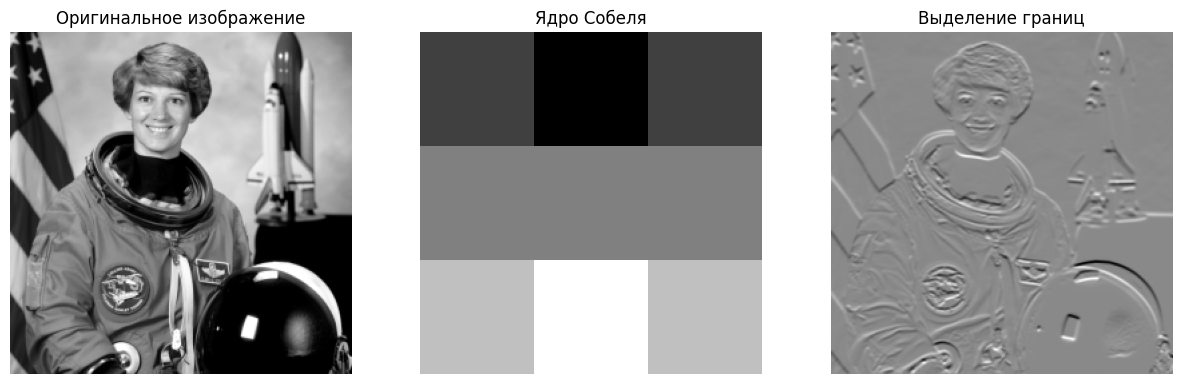

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import data, color
from skimage.transform import rescale

# Загрузка изображения и преобразование в полутоновое
image = color.rgb2gray(data.astronaut())
image_rescaled = rescale(image, 0.5, anti_aliasing=True)

# Определение ядра свертки (пример: оператор Собеля для выделения границ)
kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Применение свертки
edges = signal.convolve2d(image_rescaled, kernel, boundary="symm", mode="same")

# Визуализация результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Оригинальное изображение
ax[0].imshow(image_rescaled, cmap="gray")
ax[0].axis("off")
ax[0].set_title("Оригинальное изображение")

# Ядро свертки
ax[1].imshow(kernel, cmap="gray")
ax[1].axis("off")
ax[1].set_title("Ядро Собеля")

# Изображение после применения свертки
ax[2].imshow(edges, cmap="gray")
ax[2].axis("off")
ax[2].set_title("Выделение границ")

plt.show()


### 4. Нейронаука и математическое моделирование мозга

Дифференциальные и интегральные уравнения используются для моделирования процессов, происходящих в мозге, в том числе для описания динамики нейронных сетей и передачи сигналов между нейронами. Такие модели помогают понять, как работает мозг, и лежат в основе создания алгоритмов искусственного интеллекта, имитирующих эти процессы.

Модель Ходжкин-Хаксли — это классическая модель из нейронауки, описывающая как нейроны генерируют и распространяют электрические сигналы (потенциалы действия). Модель представляет собой систему дифференциальных уравнений, описывающих потоки ионов через мембрану нервной клетки, что приводит к изменению электрического потенциала мембраны во времени.

Модель описывает изменение мембранного потенциала (`V`) и трех переменных (`n, m, h`), которые представляют собой вероятности открытия ионных каналов. Эти переменные регулируют проницаемость мембраны для ионов натрия, калия и лития, что влияет на потенциал действия.

Модель Ходжкин-Хаксли дает глубокое понимание основ электрической активности нейронов и до сих пор используется в нейронауке для исследования механизмов нервной системы, несмотря на то что она была разработана более полувека назад.

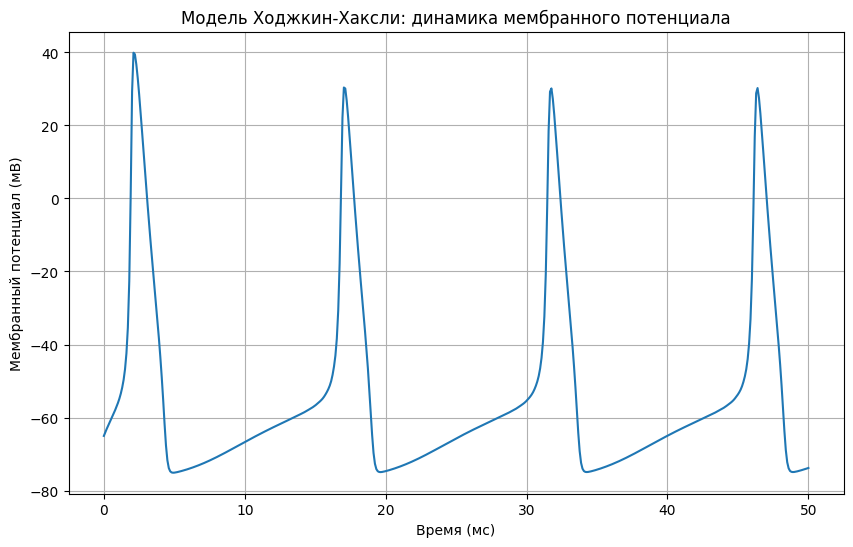

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# Определение уравнений для модели Ходжкин-Хаксли
def hodgkin_huxley(t, y):
    V, n, m, h = y
    G_Na = 120
    G_K = 36
    G_L = 0.3
    E_Na = 50
    E_K = -77
    E_L = -54.387

    # Активационные и инактивационные функции
    alpha_n = (0.01 * (V + 55)) / (1 - np.exp(-0.1 * (V + 55)))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)
    alpha_m = (0.1 * (V + 40)) / (1 - np.exp(-0.1 * (V + 40)))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-0.1 * (V + 35)))

    dVdt = (
        -G_Na * m**3 * h * (V - E_Na) - G_K * n**4 * (V - E_K) - G_L * (V - E_L) + 10
    ) / 1
    dndt = alpha_n * (1 - n) - beta_n * n
    dmdt = alpha_m * (1 - m) - beta_m * m
    dhdt = alpha_h * (1 - h) - beta_h * h

    return [dVdt, dndt, dmdt, dhdt]


# Начальные условия [V, n, m, h]
y0 = [-65, 0.3176769140606974, 0.05293248525724958, 0.5961207535084603]

# Интегрирование системы
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

sol = solve_ivp(hodgkin_huxley, t_span, y0, t_eval=t_eval)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0])
plt.title("Модель Ходжкин-Хаксли: динамика мембранного потенциала")
plt.xlabel("Время (мс)")
plt.ylabel("Мембранный потенциал (мВ)")
plt.grid(True)
plt.show()


### 5. Физически обоснованные нейронные сети

Физически обоснованные или физически инспирированные нейронные сети (Physics-Informed Neural Networks, PINNs) интегрируют в себя законы физики, описываемые дифференциальными уравнениями, непосредственно в архитектуру и процесс обучения нейронных сетей. Это позволяет моделям более точно прогнозировать или моделировать физические явления и процессы, такие как течение жидкости, динамика атмосферы, механическое поведение материалов и т. д.

##### 5.1. Пример 1

Рассмотрим простейший пример решения дифференциального уравнения с использованием PINN:

$\frac{du}{dt}=\cos 2\pi t$

$u(0)=1$

Решением данного уравнения является функция

$u(t)=\frac{1}{2\pi}\sin 2\pi t+1$

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.





Compiling model...
'compile' took 0.024099 s

Training model...

Cause: could not parse the source code of <function <lambda> at 0x000001D2464C67A0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x000001D2464C67A0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Step      Train loss              Test loss               Test metric
0         [4.26e+00, 1.00e+00]    [4.28e+00, 1.00e+00]    []  
1000      [5.00e-01, 4.95e-06]    [4.92e-01, 4.95e-06]    []  
2000      [4.96e-01, 1.03e-05]    [4.90e-01, 1.03e-05]    []  
3000      [4.90e-01, 1.10e-05]    [4.86e-01, 1.10e-05]   

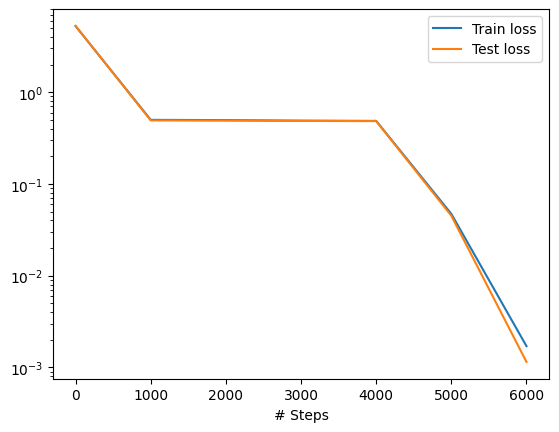

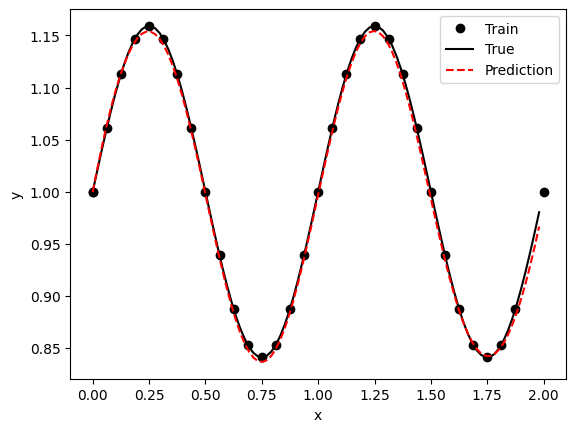

In [1]:
import tensorflow as tf
import deepxde as dde
import numpy as np
import math as m

pi = tf.constant(m.pi)

def ode_system(t, u):
    du_t = dde.grad.jacobian(u, t)
    return du_t - tf.math.cos(2 * pi * t)

def boundary(t, on_initial):
    return on_initial and np.isclose(t[0], 0)

geom = dde.geometry.TimeDomain(0, 2)

ic = dde.IC(geom, lambda t: 1, boundary)

# Эталонное решение для вычисления ошибки
def true_solution(t):
    return np.sin(2 * np.pi * t)/(2 * np.pi) + 1

data = dde.data.PDE(geom,
                    ode_system,
                    ic,
                    num_domain=30,
                    num_boundary=2,
                    solution=true_solution,
                    num_test=100)

layer_size = [1] + [32] + [1]
activation = "tanh"
initializer = "Glorot uniform"

NN = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, NN)
model.compile("adam", lr=1e-3)

losshistory, train_state = model.train(epochs=6000)
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

##### 5.2. Пример 2
Рассмотрим связанные колебания системы, представленной ниже:

<img src="https://imgur.com/FGywH0j.png" style="background: white; height: 300px"/>

Пусть $m_1=m_2=$ 1кг, $k_1=5\frac{\text{Н}}{\text{м}}$, $k_2=2\frac{\text{Н}}{\text{м}}$, $L_1=$ 0.5м, $L_2=$ 0.5м

Начальные условия:

$d_1$ = 0.5м, $d_2$ = 3.25м, $v_1=v_2=0\frac{\text{м}}{\text{с}}$

Дифференциальное уравнение, описывающее систему имеет вид:

$
\begin{cases}
m_1 \ddot{x_1} + k_1 (x_1 - L_1) - k_2 (x_2 -x_1 - L_2) && = 0 \\
m_2 \ddot{x_2} + k_2 (x_2 -x_1 - L_2) && = 0
\end{cases}
$

$x_1(0) = 0.5, \quad x_2(0) = 3.25$

$\dot{x_1}(0) = 0, \quad \dot{x_2}(0) = 0$

Compiling model...
'compile' took 0.003024 s



Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [3.70e+01, 7.16e-01, 2.50e-01, 1.06e+01, 2.40e-01, 2.69e-02]    [3.78e+01, 7.03e-01, 2.50e-01, 1.06e+01, 2.40e-01, 2.69e-02]    []  
1000      [1.19e-01, 3.07e-01, 2.00e-01, 1.31e-01, 4.84e-05, 1.87e-03]    [1.24e-01, 3.20e-01, 2.00e-01, 1.31e-01, 4.84e-05, 1.87e-03]    []  
2000      [1.54e-01, 1.15e-01, 1.69e-01, 6.07e-02, 1.46e-04, 4.01e-04]    [1.58e-01, 1.15e-01, 1.69e-01, 6.07e-02, 1.46e-04, 4.01e-04]    []  
3000      [1.13e-01, 4.03e-02, 1.40e-01, 2.24e-02, 2.91e-06, 1.90e-04]    [1.19e-01, 3.51e-02, 1.40e-01, 2.24e-02, 2.91e-06, 1.90e-04]    []  
4000      [1.03e-01, 3.02e-02, 1.08e-01, 1.54e-02, 2.24e-05, 1.29e-04]    [1.08e-01, 2.62e-02, 1.08e-01, 1.54e-02, 2.24e-05, 1.29e-04]    []  
5000      [2.62e-02, 1.33e-02, 2.09e-02, 2.85e-03, 4.38e-04, 1.18e-04]    [2.74e-02, 1.36e-02, 2.09e-02, 2.85e-03, 4

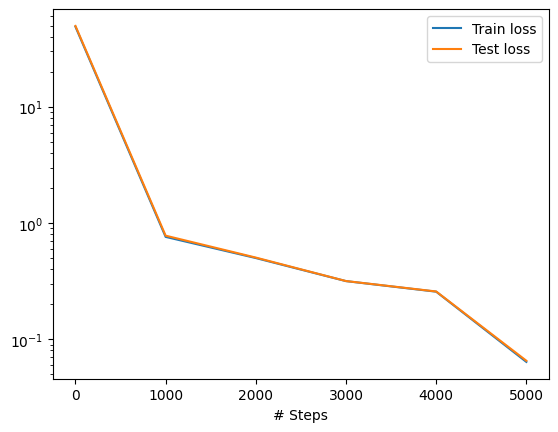

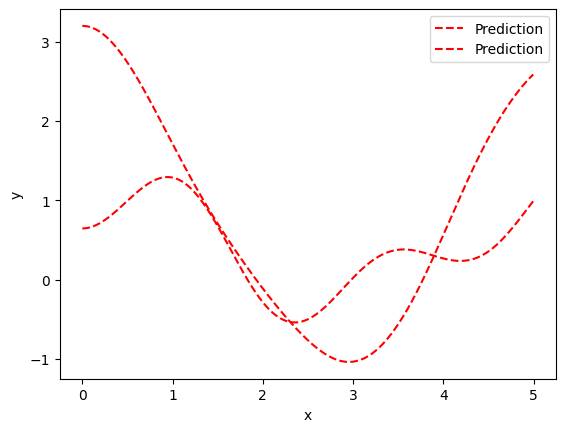

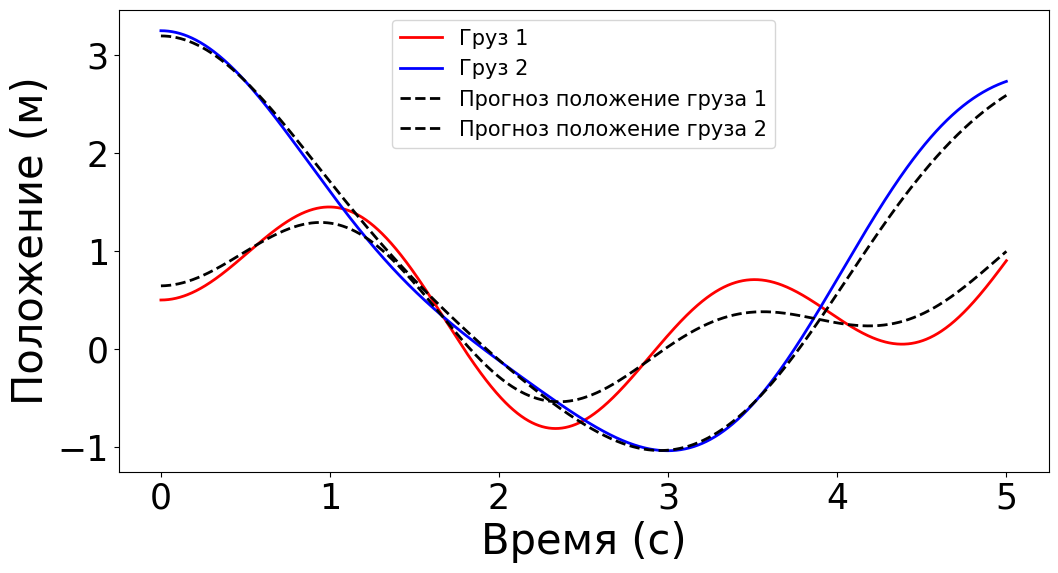

In [8]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Массы грузов
m1 = 1.0
m2 = 1.0
# Жестоскти пружин
k1 = 5.0
k2 = 2.0
# Длина пружин
L1 = 0.5
L2 = 0.5

# Начальные условия
# d1_0 и d2_0 — начальные перемещения; v1_0 и v2_0 — начальные скорости
d1_0 = 0.5
d2_0 = 3.25

v1_0 = 0.0
v2_0 = 0.0

b1 = 0
b2 = 0

# Максимальное время для симуляции
t_max = 5


def dy(t, x):
    return dde.grad.jacobian(x, t)


def pde(t, x):
    # Расположение масс
    x_1 = x[:, 0:1]
    x_2 = x[:, 1:2]

    dx1_tt = dde.grad.hessian(x, t, i=0, j=0, component=0)
    dx2_tt = dde.grad.hessian(x, t, i=0, j=0, component=1)

    pde1 = m1 * dx1_tt + k1 * (x_1 - L1) - k2 * (x_2 - x_1 - L1)
    pde2 = m2 * dx2_tt + k2 * (x_2 - x_1 - L1)

    return [pde1, pde2]


def boundary_init(t, on_boundary):
    return on_boundary and np.isclose(t[0], 0)


geom = dde.geometry.Interval(0, t_max)

init_d1 = dde.icbc.PointSetBC(
    np.array([0]), np.array([d1_0]).reshape(-1, 1), component=0
)
init_d2 = dde.icbc.PointSetBC(
    np.array([0]), np.array([d2_0]).reshape(-1, 1), component=1
)
init_v1 = dde.OperatorBC(geom, lambda x, y, _: dy(x, y[:, 0:1]), boundary_init)
init_v2 = dde.OperatorBC(geom, lambda x, y, _: dy(x, y[:, 1:2]), boundary_init)


data = dde.data.PDE(
    geom,
    pde,
    [init_d1, init_d2, init_v1, init_v2],
    num_domain=2000,
    num_boundary=100,
    num_test=1000,
)

layer_size = [1] + [20] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"

net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

losshistory, train_state = model.train(epochs=5000)
dde.saveplot(losshistory, train_state, issave=False, isplot=True)


def vectorfield(w, t, p):
    """
    Определяет дифференциальные уравнения для связанной системы пружина-масса.

    Аргументы:
        w : вектор переменных состояния:
                  w = [x1, y1, x2, y2]
        t :  время
        p :  вектор параметров:
                  p = [m1, m2, k1, k2, L1, L2, b1, b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Уравнение состояния 
    f = [
        y1,
        (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
        y2,
        (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2,
    ]
    return f


# Используем ODEINT для решения дифференциальных уравнений, определенных векторным полем.

# Параметры ODE
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = t_max
numpoints = 250


# Создаём случайные временные выборки
t = geom.random_points(5000)

t[:, 0].sort()

# Задаём параметры и начальные условия:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [d1_0, v1_0, d2_0, v2_0]

# Решаем уравнение
wsol = odeint(vectorfield, w0, t[:, 0], args=(p,), atol=abserr, rtol=relerr)

result = model.predict(t)

usol1 = np.array(result[:, 0])
usol2 = np.array(result[:, 1])


lw = 2
plt.figure(figsize=(12, 6))
plt.plot(t, wsol[:, 0], alpha=1, label="Груз 1", c="r", lw=lw)
plt.plot(t, wsol[:, 2], alpha=1, label="Груз 2", c="b", lw=lw)
plt.plot(
    t[:, 0], usol1, alpha=1, label="Прогноз положение груза 1", linestyle="dashed", c="k", lw=lw
)
plt.plot(
    t[:, 0], usol2, alpha=1, label="Прогноз положение груза 2", linestyle="dashed", c="k", lw=lw
)
plt.legend(fontsize=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Время (с)", fontsize=30)
plt.ylabel("Положение (м)", fontsize=30)
plt.show()


##### 5.3. Пример 3
Рассмотрим течение жидкости вдоль двух параллельных бесконечных пластин:

<img src="https://imgur.com/0bHbPh9.png" style="background: white; height: 300px"/>

Пусть $\rho=5\frac{\text{кг}}{\text{м}^3}$, $\mu = 1\frac{\text{Н}\cdot \text{с}}{\text{м}^2}$, $D=$ 1м, $L=$ 2м, $u_{in}=1\frac{\text{м}}{\text{с}}$

Дифференциальное уравнение, описывающее систему имеет вид:

$\begin{cases}
u{\partial u \over \partial x} + v{\partial u \over \partial y} + {1 \over \rho}{\partial p \over \partial x} - \nu \ \left({\partial^2 u \over {\partial x^2}} + {\partial^2 u \over {\partial y^2}}\right) &= 0\\\\
u{\partial v \over \partial x} + v{\partial v \over \partial y} + {1 \over \rho}{\partial p \over \partial y} - \nu \ \left({\partial^2 v \over {\partial x^2}} + {\partial^2 v \over {\partial y^2}}\right) &= 0\\\\
{\partial u \over \partial x} + {\partial v \over \partial y} &= 0
\end{cases}$

$u(x,y) = 0, \quad v(x,y) = 0 \qquad \text{при} \quad y = \frac{D}{2} \ \; \text{или} \; -\frac{D}{2}$

$u(-1,y) = u_{\text{in}}, \quad v(-1,y) = 0$

$p(1,y) = 0, \quad v(1,y) = 0$

Compiling model...
'compile' took 0.002558 s

Training model...

Cause: could not parse the source code of <function <lambda> at 0x0000016C0614A8C0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000016C0614A8C0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000016C7E12CF70>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: coul

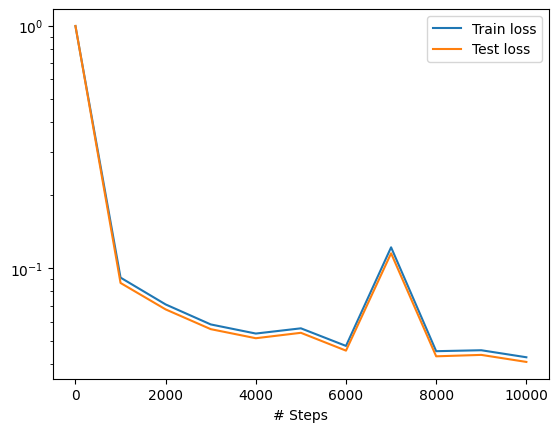

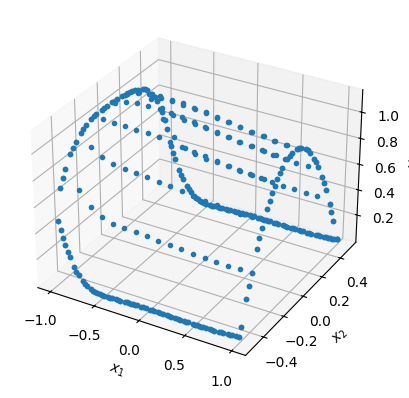

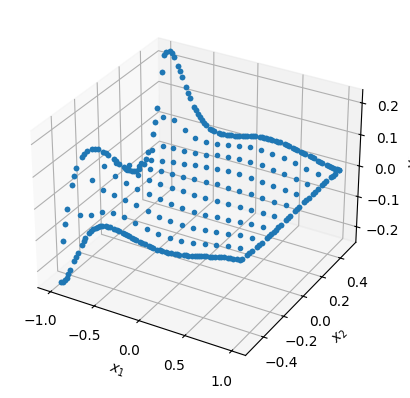

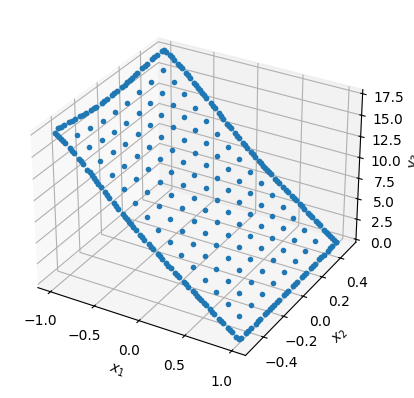

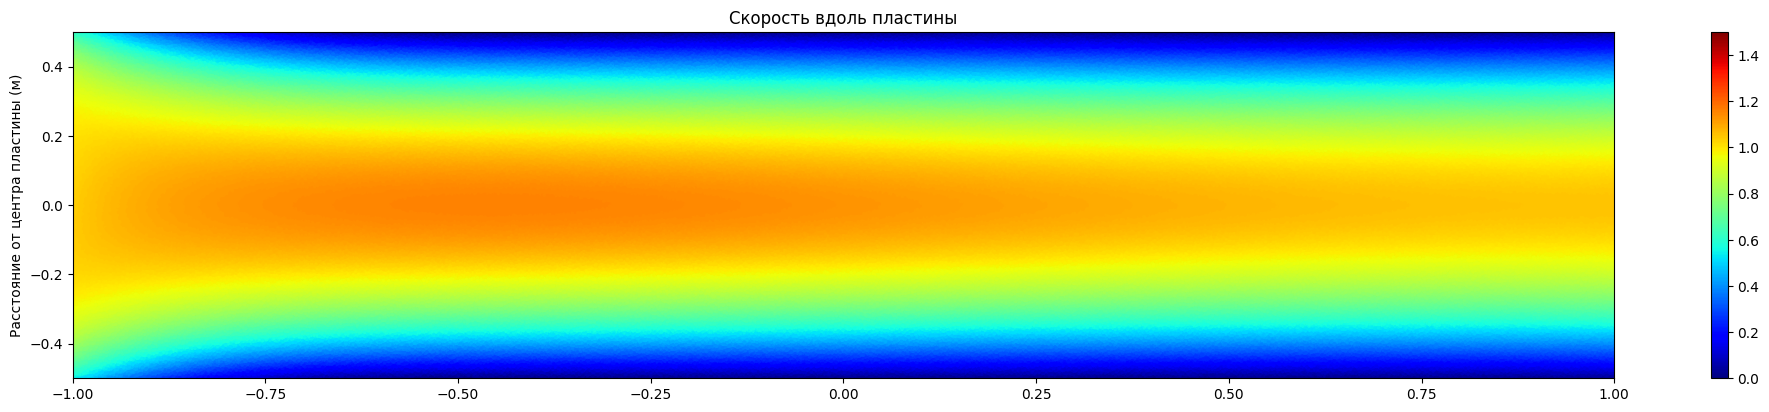

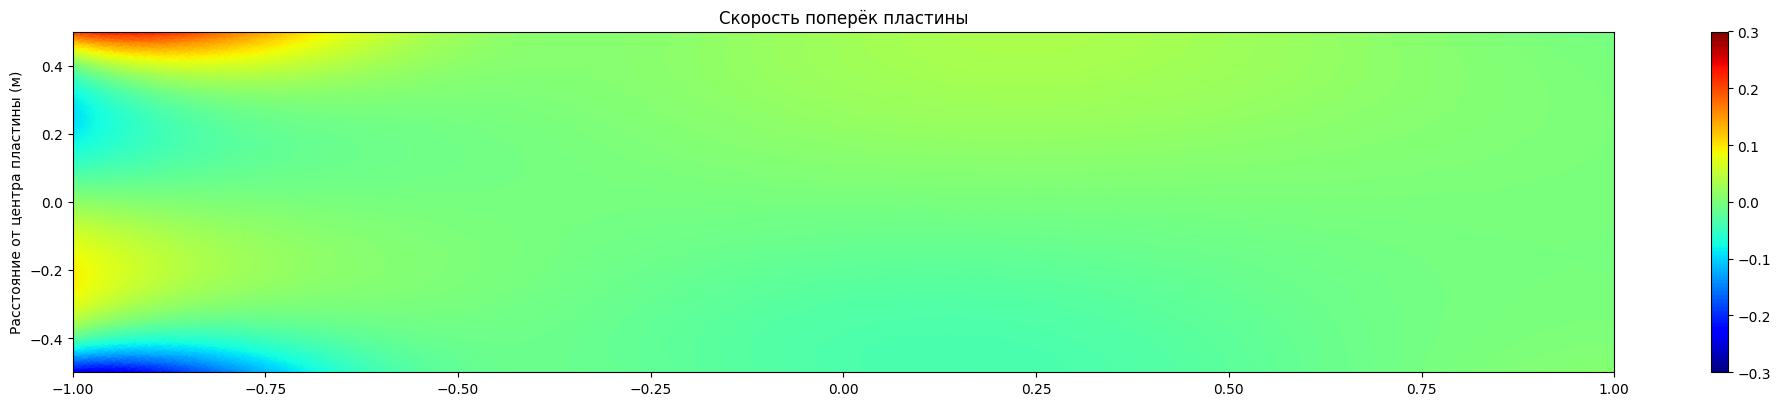

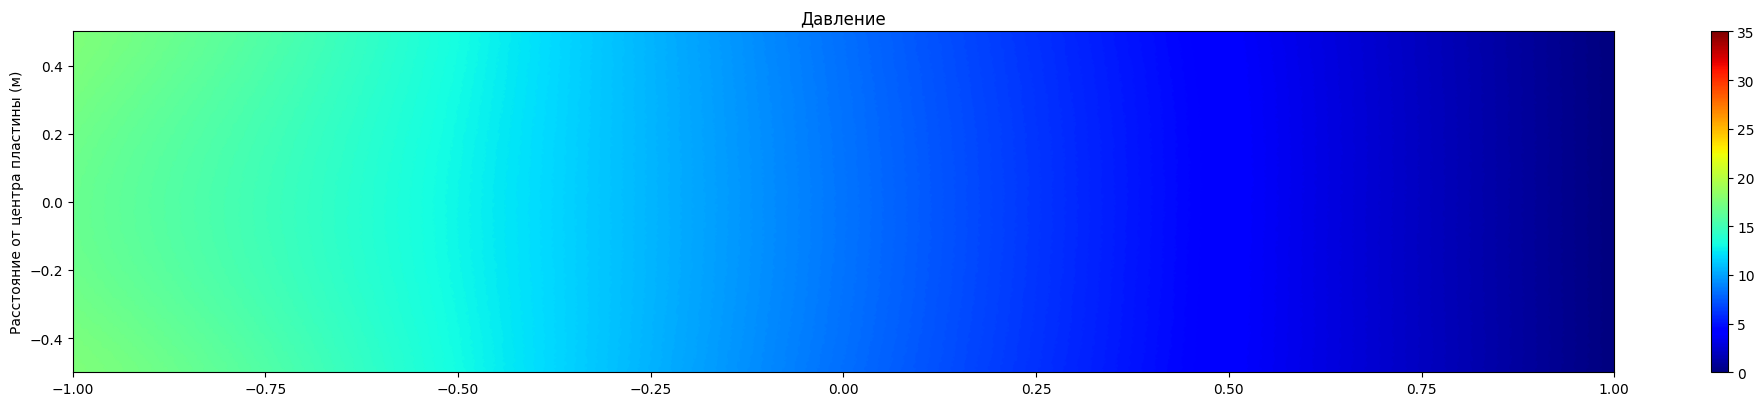

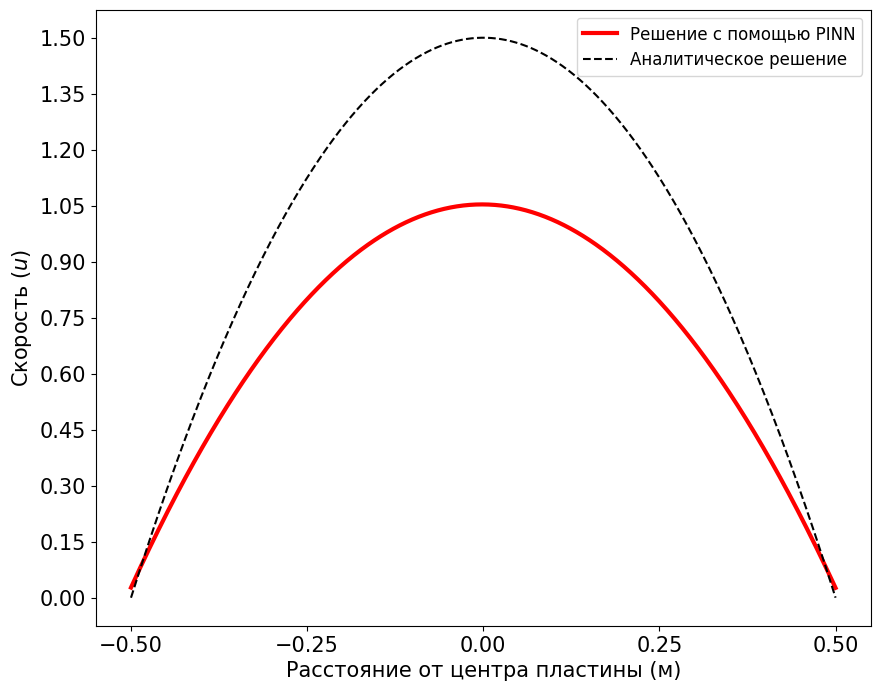

In [11]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

rho = 1
mu = 1
u_in = 1
D = 1
L = 2


def boundary_wall(X, on_boundary):
    on_wall = np.logical_and(
        np.logical_or(np.isclose(X[1], -D / 2), np.isclose(X[1], D / 2)), on_boundary
    )
    return on_wall


def boundary_inlet(X, on_boundary):
    return on_boundary and np.isclose(X[0], -L / 2)


def boundary_outlet(X, on_boundary):
    return on_boundary and np.isclose(X[0], L / 2)


def pde(X, Y):
    du_x = dde.grad.jacobian(Y, X, i=0, j=0)
    du_y = dde.grad.jacobian(Y, X, i=0, j=1)
    dv_x = dde.grad.jacobian(Y, X, i=1, j=0)
    dv_y = dde.grad.jacobian(Y, X, i=1, j=1)
    dp_x = dde.grad.jacobian(Y, X, i=2, j=0)
    dp_y = dde.grad.jacobian(Y, X, i=2, j=1)
    du_xx = dde.grad.hessian(Y, X, i=0, j=0, component=0)
    du_yy = dde.grad.hessian(Y, X, i=1, j=1, component=0)
    dv_xx = dde.grad.hessian(Y, X, i=0, j=0, component=1)
    dv_yy = dde.grad.hessian(Y, X, i=1, j=1, component=1)

    pde_u = (
        Y[:, 0:1] * du_x
        + Y[:, 1:2] * du_y
        + 1 / rho * dp_x
        - (mu / rho) * (du_xx + du_yy)
    )
    pde_v = (
        Y[:, 0:1] * dv_x
        + Y[:, 1:2] * dv_y
        + 1 / rho * dp_y
        - (mu / rho) * (dv_xx + dv_yy)
    )
    pde_cont = du_x + dv_y

    return [pde_u, pde_v, pde_cont]


geom = dde.geometry.Rectangle(xmin=[-L / 2, -D / 2], xmax=[L / 2, D / 2])

bc_wall_u = dde.DirichletBC(geom, lambda X: 0.0, boundary_wall, component=0)
bc_wall_v = dde.DirichletBC(geom, lambda X: 0.0, boundary_wall, component=1)

bc_inlet_u = dde.DirichletBC(geom, lambda X: u_in, boundary_inlet, component=0)
bc_inlet_v = dde.DirichletBC(geom, lambda X: 0.0, boundary_inlet, component=1)

bc_outlet_p = dde.DirichletBC(geom, lambda X: 0.0, boundary_outlet, component=2)
bc_outlet_v = dde.DirichletBC(geom, lambda X: 0.0, boundary_outlet, component=1)

data = dde.data.PDE(
    geom,
    pde,
    [bc_wall_u, bc_wall_v, bc_inlet_u, bc_inlet_v, bc_outlet_p, bc_outlet_v],
    num_domain=2000,
    num_boundary=200,
    num_test=100,
)

layer_size = [2] + [64] * 5 + [3]
activation = "tanh"
initializer = "Glorot uniform"

net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

losshistory, train_state = model.train(epochs=10000)
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

samples = geom.random_points(1000000)
result = model.predict(samples)
color_legend = [[0, 1.5], [-0.3, 0.3], [0, 35]]

for idx, title in enumerate(
    ["Скорость вдоль пластины", "Скорость поперёк пластины", "Давление"]
):
    plt.figure(figsize=(20, 4))
    plt.scatter(samples[:, 0], samples[:, 1], c=result[:, idx], cmap="jet", s=2)
    plt.colorbar()
    plt.clim(color_legend[idx])
    plt.xlim((0 - L / 2, L - L / 2))
    plt.ylim((0 - D / 2, D - D / 2))
    plt.tight_layout()
    plt.ylabel("Расстояние от центра пластины (м)")
    plt.title(title)
    plt.show()

x = np.ones([1000, 1])
y = np.linspace(-0.5, 0.5, 1000).reshape(1000, 1)
outlet = np.hstack([x, y])

analytic_solution = u_in * 1.5 * (1 - ((y) / (D / 2)) ** 2)

PINN_solution = model.predict(outlet)

plt.figure(figsize=(10, 8))
plt.plot(y, PINN_solution[:, 0], c="r", linewidth=3, label="Решение с помощью PINN")
plt.plot(y, analytic_solution, c="k", linestyle="dashed", label="Аналитическое решение")
plt.xticks(np.linspace(-0.5, 0.5, 5), fontsize=15)
plt.yticks(np.linspace(0, 1.5, 11), fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("Расстояние от центра пластины (м)", fontsize=15)
plt.ylabel("Скорость ($u$)", fontsize=15)
plt.show()
